In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# LOAD DATA
df = pd.read_csv("SampleSuperstore.csv")

print("Dataset Loaded Successfully.")
df.head()

Dataset Loaded Successfully.


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# DATA CLEANING

# Check missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Create Profit Margin Variable
df["Profit_Margin"] = df["Profit"] / df["Sales"]

# Create Discount Bins
df["Discount_Bin"] = pd.cut(df["Discount"],
                            bins=[0, 0.1, 0.2, 0.3, 0.5, 1.0],
                            labels=["0–10%", "10–20%", "20–30%", "30–50%", "50–100%"],
                            include_lowest=True)

df.head()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin,Discount_Bin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600,0–10%
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000,0–10%
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700,0–10%
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000,30–50%
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125,10–20%


In [6]:
# DESCRIPTIVE ANALYSIS
print("\nSummary Statistics:")
display(df[["Sales", "Quantity", "Discount", "Profit", "Profit_Margin"]].describe())

# Category & Region summary
print(df.groupby("Category")[["Sales", "Profit", "Profit_Margin"]].mean())
print(df.groupby("Region")[["Sales", "Profit", "Profit_Margin"]].mean())


Summary Statistics:


,Sales,Quantity,Discount,Profit,Profit_Margin
count,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
mean,230.148902,3.790719,0.156278,28.69013,0.120114
std,623.721409,2.226657,0.206455,234.45784,0.466638
min,0.444000,1.000000,0.000000,-6599.97800,-2.750000
25%,17.300000,2.000000,0.000000,1.72620,0.075000
50%,54.816000,3.000000,0.200000,8.67100,0.270000
75%,209.970000,5.000000,0.200000,29.37200,0.362500
max,22638.480000,14.000000,0.800000,8399.97600,0.500000


                      Sales     Profit  Profit_Margin
Category                                             
Furniture        350.002981   8.697740       0.038679
Office Supplies  119.550107  20.353403       0.137735
Technology       452.709276  78.752002       0.156138
              Sales     Profit  Profit_Margin
Region                                       
Central  215.947759  17.100421      -0.103833
East     238.465798  32.163905       0.167130
South    241.803645  28.857673       0.163519
West     227.139254  33.927281       0.218846


In [7]:
# DATA VISUALIZATION

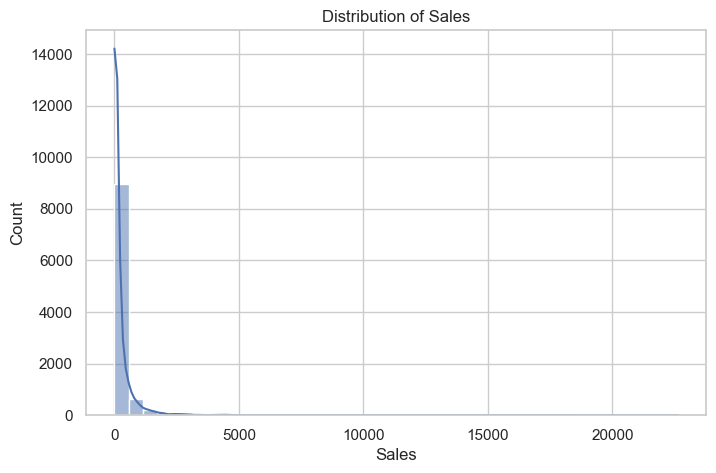

In [8]:
# Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], bins=40, kde=True)
plt.title("Distribution of Sales")
plt.show()

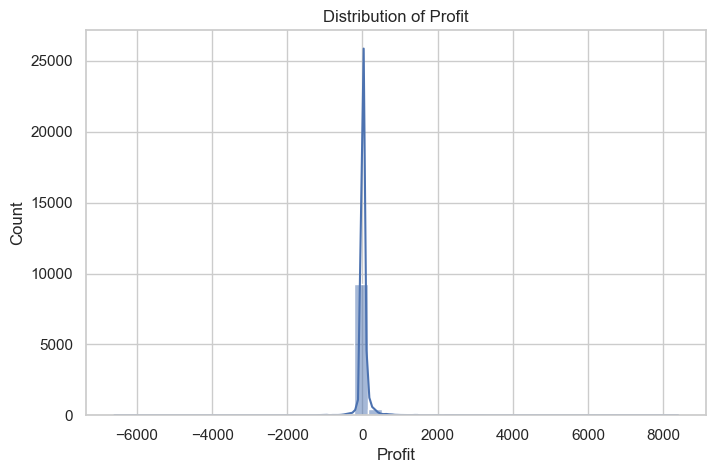

In [9]:
# Profit Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Profit"], bins=40, kde=True)
plt.title("Distribution of Profit")
plt.show()

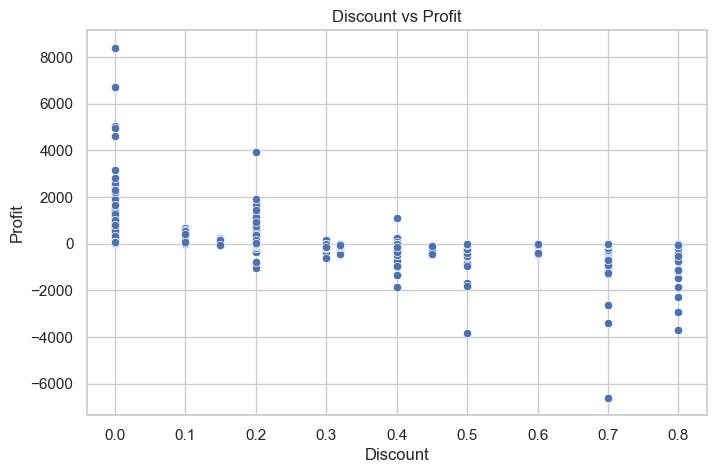

In [10]:
# Discount vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit")
plt.show()

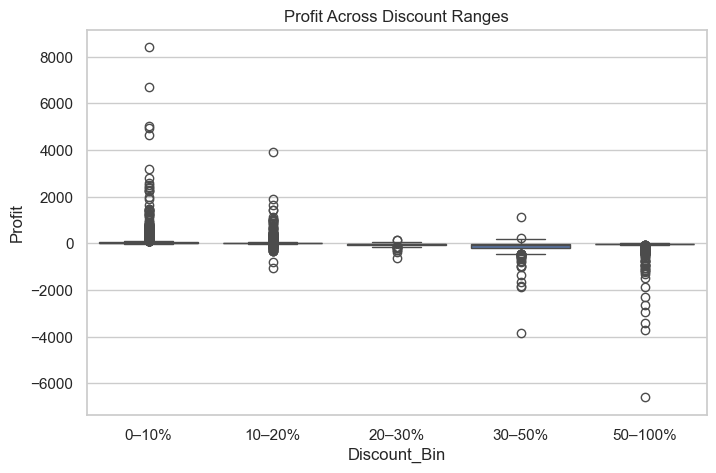

In [11]:
# Profit by Discount Bin
plt.figure(figsize=(8,5))
sns.boxplot(x="Discount_Bin", y="Profit", data=df)
plt.title("Profit Across Discount Ranges")
plt.show()

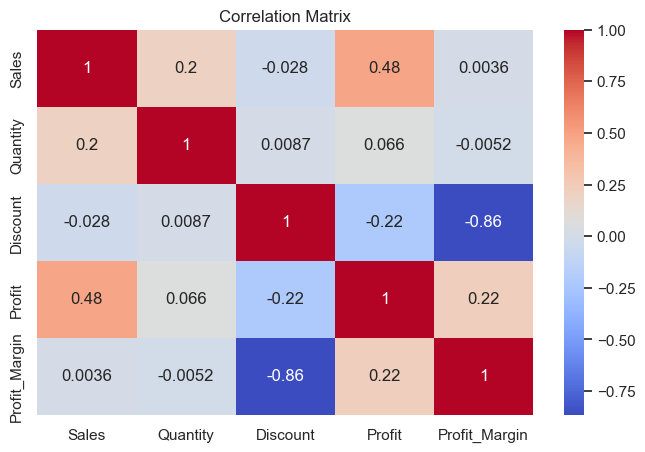

In [12]:
# CORRELATION ANALYSIS
corr_matrix = df[["Sales", "Quantity", "Discount", "Profit", "Profit_Margin"]].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [13]:
# REGRESSION ANALYSIS

In [24]:
# Select Variables for Regression
selected_columns = ["Discount", "Sales", "Quantity", "Category", "Region", "Profit", "Profit_Margin"]
df_encoded = df[selected_columns]

# Encode Categorical Variables
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Convert only boolean columns to numeric (0 and 1)
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print(df_encoded.dtypes)

Discount                    float64
Sales                       float64
Quantity                      int64
Profit                      float64
Profit_Margin               float64
Category_Office Supplies      int64
Category_Technology           int64
Region_East                   int64
Region_South                  int64
Region_West                   int64
dtype: object


In [25]:
# Define Dependent & Independent Variables
X = df_encoded.drop(["Profit", "Profit_Margin"], axis=1)
y = df_encoded["Profit"]

# Add constant term
X_const = sm.add_constant(X)

# Fit Regression Model
model = sm.OLS(y, X_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     485.9
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:52:28   Log-Likelihood:                -66961.
No. Observations:                9977   AIC:                         1.339e+05
Df Residuals:                    9968   BIC:                         1.340e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [26]:
# VIF (MULTICOLLINEARITY TEST)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]
print(vif_data)

                    Feature        VIF
0                     const  12.631196
1                  Discount   1.064713
2                     Sales   1.101591
3                  Quantity   1.045847
4  Category_Office Supplies   1.564777
5       Category_Technology   1.536597
6               Region_East   1.637876
7              Region_South   1.452327
8               Region_West   1.709676


In [27]:
# HETEROSCEDASTICITY TEST (BREUSCH–PAGAN)
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier', 'p-value', 'f-value', 'f p-value']

print("\nBreusch–Pagan Test Results:")
print(dict(zip(labels, bp_test)))


Breusch–Pagan Test Results:
{'Lagrange multiplier': np.float64(2877.249629270987), 'p-value': np.float64(0.0), 'f-value': np.float64(504.9548013479706), 'f p-value': np.float64(0.0)}


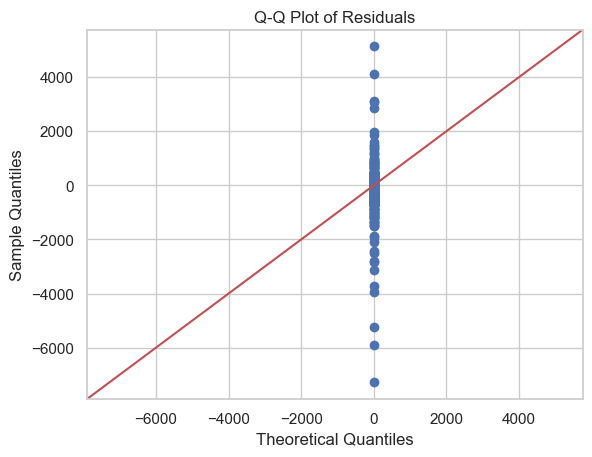

In [28]:
# QQ PLOT FOR RESIDUAL NORMALITY
sm.qqplot(model.resid, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

C:\Users\CAT\AppData\Local\Temp\ipykernel_17208\3107088933.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm = df.groupby("Discount_Bin")[["Profit_Margin", "Profit", "Sales"]].mean()



Profit Margin by Discount Range:
              Profit_Margin      Profit       Sales
Discount_Bin                                       
0–10%              0.336465   67.583197  233.896110
10–20%             0.174653   24.757247  213.782312
20–30%            -0.115803  -45.828401  455.510102
30–50%            -0.296062 -156.282991  630.047603
50–100%           -1.138070  -89.535455   75.117163


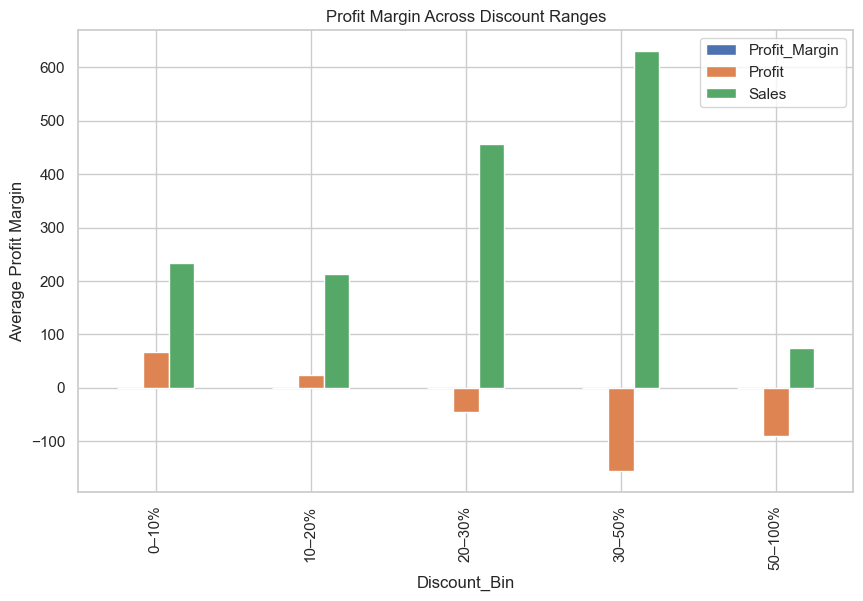

In [29]:
# PROFIT MARGIN ANALYSIS BY DISCOUNT BIN

pm = df.groupby("Discount_Bin")[["Profit_Margin", "Profit", "Sales"]].mean()

print("\nProfit Margin by Discount Range:")
print(pm)

pm.plot(kind="bar", figsize=(10,6))
plt.title("Profit Margin Across Discount Ranges")
plt.ylabel("Average Profit Margin")
plt.show()

In [30]:
# CATEGORY & REGION SPECIFIC ANALYSIS

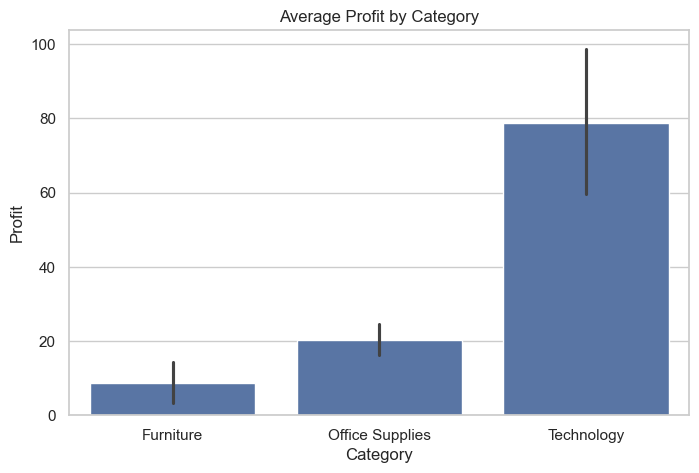

In [31]:
# Profit by Category
plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Profit", data=df)
plt.title("Average Profit by Category")
plt.show()

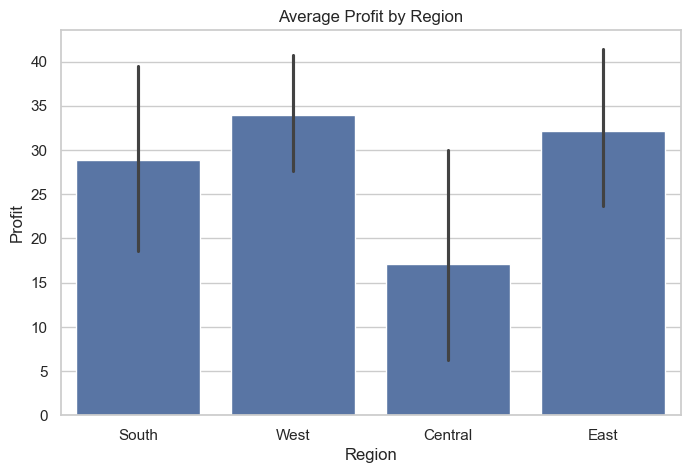

In [32]:
# Profit by Region
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Profit", data=df)
plt.title("Average Profit by Region")
plt.show()

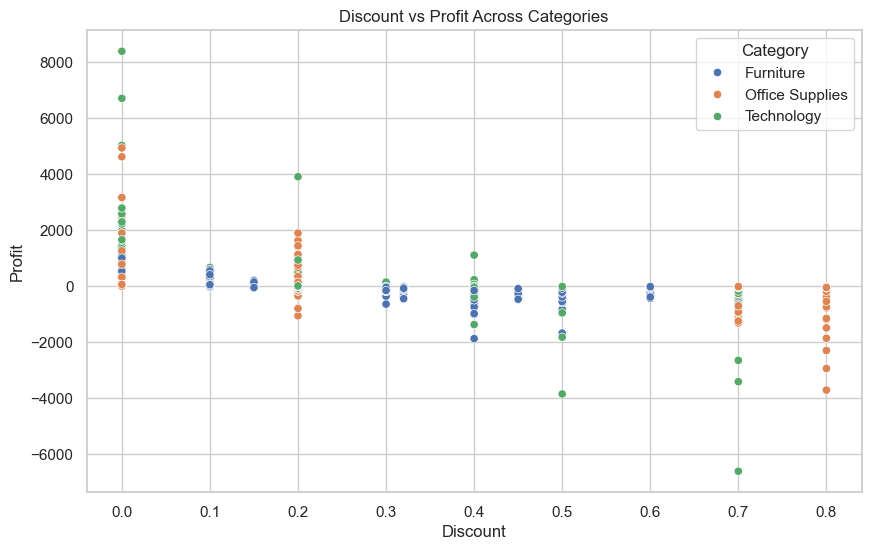

In [33]:
# Discount vs Profit by Category
plt.figure(figsize=(10,6))
sns.scatterplot(x="Discount", y="Profit", hue="Category", data=df)
plt.title("Discount vs Profit Across Categories")
plt.show()


Optimal Discount Range (Based on Highest Profit):


C:\Users\CAT\AppData\Local\Temp\ipykernel_17208\1494979678.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimal = df.groupby("Discount_Bin")[["Sales", "Profit"]].mean()


,Sales,Profit
Discount_Bin,,
0–10%,233.896110,67.583197
10–20%,213.782312,24.757247
20–30%,455.510102,-45.828401
50–100%,75.117163,-89.535455
30–50%,630.047603,-156.282991


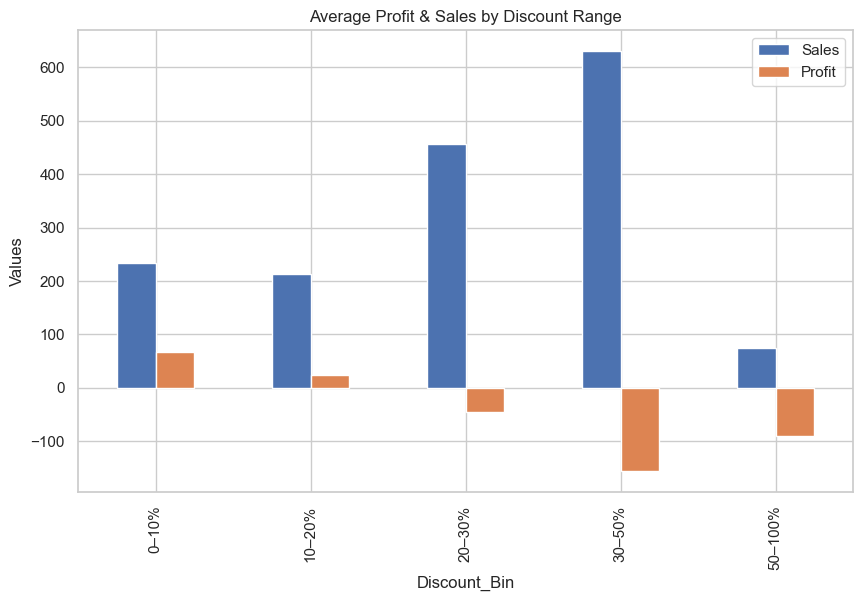

In [34]:
# OPTIMAL DISCOUNT IDENTIFICATION

optimal = df.groupby("Discount_Bin")[["Sales", "Profit"]].mean()

print("\nOptimal Discount Range (Based on Highest Profit):")
display(optimal.sort_values("Profit", ascending=False))

optimal.plot(kind="bar", figsize=(10,6))
plt.title("Average Profit & Sales by Discount Range")
plt.ylabel("Values")
plt.show()